In [32]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [33]:
data=pd.read_csv("/Users/Tara/Downloads/policy_mobility_df.csv")

In [34]:
data

,Unnamed: 0,RegionName,Date,StringencyIndexForDisplay,GovernmentResponseIndexForDisplay,ContainmentHealthIndexForDisplay,EconomicSupportIndexForDisplay,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,parks_percent_change_from_baseline
0,0,Alaska,20200301,11.11,10.26,12.12,0.0,19.0,14.5,18.0,5.5,-1.0,11.5
1,1,Alaska,20200302,11.11,10.26,12.12,0.0,6.0,6.5,6.5,0.5,0.0,6.5
2,2,Alaska,20200303,11.11,10.26,12.12,0.0,11.0,10.0,4.0,3.0,0.0,-5.0
3,3,Alaska,20200304,11.11,10.26,12.12,0.0,10.0,8.5,7.5,3.0,-0.5,3.0
4,4,Alaska,20200305,11.11,10.26,12.12,0.0,8.5,7.5,3.0,2.5,-0.5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341,9341,Wyoming,20200827,37.04,46.15,45.45,50.0,8.0,18.0,17.5,-25.5,3.5,174.5
9342,9342,Wyoming,20200828,37.04,46.15,45.45,50.0,3.5,17.0,19.5,-23.5,3.0,196.0
9343,9343,Wyoming,20200829,37.04,46.15,45.45,50.0,7.0,23.0,44.0,-8.0,-1.0,283.0
9344,9344,Wyoming,20200830,37.04,46.15,45.45,50.0,11.5,20.0,25.5,-7.0,0.0,186.0


In [35]:
data["AvgIndex"]=(data["StringencyIndexForDisplay"]+data["GovernmentResponseIndexForDisplay"]+data["ContainmentHealthIndexForDisplay"]+data["EconomicSupportIndexForDisplay"])/4
data["AvgMobility"]=(data["retail_and_recreation_percent_change_from_baseline"]+data["grocery_and_pharmacy_percent_change_from_baseline"]+data["transit_stations_percent_change_from_baseline"]+data["workplaces_percent_change_from_baseline"])/4




In [36]:
data

,Unnamed: 0,RegionName,Date,StringencyIndexForDisplay,GovernmentResponseIndexForDisplay,ContainmentHealthIndexForDisplay,EconomicSupportIndexForDisplay,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,parks_percent_change_from_baseline,AvgIndex,AvgMobility
0,0,Alaska,20200301,11.11,10.26,12.12,0.0,19.0,14.5,18.0,5.5,-1.0,11.5,8.3725,14.250
1,1,Alaska,20200302,11.11,10.26,12.12,0.0,6.0,6.5,6.5,0.5,0.0,6.5,8.3725,4.875
2,2,Alaska,20200303,11.11,10.26,12.12,0.0,11.0,10.0,4.0,3.0,0.0,-5.0,8.3725,7.000
3,3,Alaska,20200304,11.11,10.26,12.12,0.0,10.0,8.5,7.5,3.0,-0.5,3.0,8.3725,7.250
4,4,Alaska,20200305,11.11,10.26,12.12,0.0,8.5,7.5,3.0,2.5,-0.5,6.0,8.3725,5.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341,9341,Wyoming,20200827,37.04,46.15,45.45,50.0,8.0,18.0,17.5,-25.5,3.5,174.5,44.6600,4.500
9342,9342,Wyoming,20200828,37.04,46.15,45.45,50.0,3.5,17.0,19.5,-23.5,3.0,196.0,44.6600,4.125
9343,9343,Wyoming,20200829,37.04,46.15,45.45,50.0,7.0,23.0,44.0,-8.0,-1.0,283.0,44.6600,16.500
9344,9344,Wyoming,20200830,37.04,46.15,45.45,50.0,11.5,20.0,25.5,-7.0,0.0,186.0,44.6600,12.500


In [37]:
data.RegionName.unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'Washington DC', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana',
       'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland',
       'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Mississippi',
       'Montana', 'North Carolina', 'North Dakota', 'Nebraska',
       'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia',
       'Wyoming'], dtype=object)

In [61]:
data=data[data.RegionName=="Alaska"]

In [62]:
data

,Unnamed: 0,RegionName,Date,StringencyIndexForDisplay,GovernmentResponseIndexForDisplay,ContainmentHealthIndexForDisplay,EconomicSupportIndexForDisplay,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,parks_percent_change_from_baseline,AvgIndex,AvgMobility
0,0,Alaska,20200301,0.126307,0.120338,0.139118,0.00,19.0,14.5,18.0,5.5,-1.0,11.5,0.098364,0.730858
1,1,Alaska,20200302,0.126307,0.120338,0.139118,0.00,6.0,6.5,6.5,0.5,0.0,6.5,0.098364,0.643852
2,2,Alaska,20200303,0.126307,0.120338,0.139118,0.00,11.0,10.0,4.0,3.0,0.0,-5.0,0.098364,0.663573
3,3,Alaska,20200304,0.126307,0.120338,0.139118,0.00,10.0,8.5,7.5,3.0,-0.5,3.0,0.098364,0.665893
4,4,Alaska,20200305,0.126307,0.120338,0.139118,0.00,8.5,7.5,3.0,2.5,-0.5,6.0,0.098364,0.648492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,179,Alaska,20200827,0.584243,0.733052,0.691345,0.75,1.5,5.5,-9.0,-29.0,7.5,154.0,0.731694,0.526682
180,180,Alaska,20200828,0.584243,0.733052,0.691345,0.75,-1.0,5.5,-10.0,-29.0,7.5,177.5,0.731694,0.518561
181,181,Alaska,20200829,0.584243,0.733052,0.691345,0.75,-4.0,9.5,0.0,-13.5,1.0,161.5,0.731694,0.580046
182,182,Alaska,20200830,0.584243,0.733052,0.691345,0.75,6.5,8.5,-1.0,-12.5,1.0,146.0,0.731694,0.602088


In [40]:
scaler=preprocessing.MinMaxScaler()
data[["AvgIndex"]]=scaler.fit_transform(data[["AvgIndex"]])

In [41]:
data

,Unnamed: 0,RegionName,Date,StringencyIndexForDisplay,GovernmentResponseIndexForDisplay,ContainmentHealthIndexForDisplay,EconomicSupportIndexForDisplay,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,parks_percent_change_from_baseline,AvgIndex,AvgMobility
0,0,Alaska,20200301,11.11,10.26,12.12,0.0,19.0,14.5,18.0,5.5,-1.0,11.5,0.098364,14.250
1,1,Alaska,20200302,11.11,10.26,12.12,0.0,6.0,6.5,6.5,0.5,0.0,6.5,0.098364,4.875
2,2,Alaska,20200303,11.11,10.26,12.12,0.0,11.0,10.0,4.0,3.0,0.0,-5.0,0.098364,7.000
3,3,Alaska,20200304,11.11,10.26,12.12,0.0,10.0,8.5,7.5,3.0,-0.5,3.0,0.098364,7.250
4,4,Alaska,20200305,11.11,10.26,12.12,0.0,8.5,7.5,3.0,2.5,-0.5,6.0,0.098364,5.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341,9341,Wyoming,20200827,37.04,46.15,45.45,50.0,8.0,18.0,17.5,-25.5,3.5,174.5,0.524686,4.500
9342,9342,Wyoming,20200828,37.04,46.15,45.45,50.0,3.5,17.0,19.5,-23.5,3.0,196.0,0.524686,4.125
9343,9343,Wyoming,20200829,37.04,46.15,45.45,50.0,7.0,23.0,44.0,-8.0,-1.0,283.0,0.524686,16.500
9344,9344,Wyoming,20200830,37.04,46.15,45.45,50.0,11.5,20.0,25.5,-7.0,0.0,186.0,0.524686,12.500


In [42]:
scaler=preprocessing.MinMaxScaler()
data[["AvgMobility"]]=scaler.fit_transform(data[["AvgMobility"]])

In [43]:
scaler=preprocessing.MinMaxScaler()
data[["StringencyIndexForDisplay"]]=scaler.fit_transform(data[["StringencyIndexForDisplay"]])

scaler=preprocessing.MinMaxScaler()
data[["GovernmentResponseIndexForDisplay"]]=scaler.fit_transform(data[["GovernmentResponseIndexForDisplay"]])

scaler=preprocessing.MinMaxScaler()
data[["ContainmentHealthIndexForDisplay"]]=scaler.fit_transform(data[["ContainmentHealthIndexForDisplay"]])

scaler=preprocessing.MinMaxScaler()
data[["EconomicSupportIndexForDisplay"]]=scaler.fit_transform(data[["EconomicSupportIndexForDisplay"]])


In [44]:
data

,Unnamed: 0,RegionName,Date,StringencyIndexForDisplay,GovernmentResponseIndexForDisplay,ContainmentHealthIndexForDisplay,EconomicSupportIndexForDisplay,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,parks_percent_change_from_baseline,AvgIndex,AvgMobility
0,0,Alaska,20200301,0.126307,0.120338,0.139118,0.0,19.0,14.5,18.0,5.5,-1.0,11.5,0.098364,0.730858
1,1,Alaska,20200302,0.126307,0.120338,0.139118,0.0,6.0,6.5,6.5,0.5,0.0,6.5,0.098364,0.643852
2,2,Alaska,20200303,0.126307,0.120338,0.139118,0.0,11.0,10.0,4.0,3.0,0.0,-5.0,0.098364,0.663573
3,3,Alaska,20200304,0.126307,0.120338,0.139118,0.0,10.0,8.5,7.5,3.0,-0.5,3.0,0.098364,0.665893
4,4,Alaska,20200305,0.126307,0.120338,0.139118,0.0,8.5,7.5,3.0,2.5,-0.5,6.0,0.098364,0.648492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341,9341,Wyoming,20200827,0.421101,0.541285,0.521694,0.5,8.0,18.0,17.5,-25.5,3.5,174.5,0.524686,0.640371
9342,9342,Wyoming,20200828,0.421101,0.541285,0.521694,0.5,3.5,17.0,19.5,-23.5,3.0,196.0,0.524686,0.636891
9343,9343,Wyoming,20200829,0.421101,0.541285,0.521694,0.5,7.0,23.0,44.0,-8.0,-1.0,283.0,0.524686,0.751740
9344,9344,Wyoming,20200830,0.421101,0.541285,0.521694,0.5,11.5,20.0,25.5,-7.0,0.0,186.0,0.524686,0.714617


In [45]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [46]:
data2col=data[["StringencyIndexForDisplay","GovernmentResponseIndexForDisplay","ContainmentHealthIndexForDisplay","EconomicSupportIndexForDisplay", "AvgMobility"]]






In [47]:
data2col=data2col.to_numpy()
data2col

array([[0.12630741, 0.12033779, 0.13911846, 0.        , 0.73085847],
       [0.12630741, 0.12033779, 0.13911846, 0.        , 0.64385151],
       [0.12630741, 0.12033779, 0.13911846, 0.        , 0.66357309],
       ...,
       [0.4211005 , 0.54128548, 0.52169421, 0.5       , 0.75174014],
       [0.4211005 , 0.54128548, 0.52169421, 0.5       , 0.71461717],
       [0.4211005 , 0.54128548, 0.52169421, 0.5       , 0.68097448]])

In [48]:
# convert series to supervised learning
# FROM https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

data2col=series_to_supervised(data2col,3)

In [50]:
data2col

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
3,0.126307,0.120338,0.139118,0.0,0.730858,0.126307,0.120338,0.139118,0.0,0.643852,0.126307,0.120338,0.139118,0.0,0.663573,0.126307,0.120338,0.139118,0.0,0.665893
4,0.126307,0.120338,0.139118,0.0,0.643852,0.126307,0.120338,0.139118,0.0,0.663573,0.126307,0.120338,0.139118,0.0,0.665893,0.126307,0.120338,0.139118,0.0,0.648492
5,0.126307,0.120338,0.139118,0.0,0.663573,0.126307,0.120338,0.139118,0.0,0.665893,0.126307,0.120338,0.139118,0.0,0.648492,0.126307,0.120338,0.139118,0.0,0.645012
6,0.126307,0.120338,0.139118,0.0,0.665893,0.126307,0.120338,0.139118,0.0,0.648492,0.126307,0.120338,0.139118,0.0,0.645012,0.126307,0.120338,0.139118,0.0,0.685615
7,0.126307,0.120338,0.139118,0.0,0.648492,0.126307,0.120338,0.139118,0.0,0.645012,0.126307,0.120338,0.139118,0.0,0.685615,0.126307,0.120338,0.139118,0.0,0.672854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341,0.421101,0.541285,0.521694,0.5,0.663573,0.421101,0.541285,0.521694,0.5,0.625677,0.421101,0.541285,0.521694,0.5,0.634571,0.421101,0.541285,0.521694,0.5,0.640371
9342,0.421101,0.541285,0.521694,0.5,0.625677,0.421101,0.541285,0.521694,0.5,0.634571,0.421101,0.541285,0.521694,0.5,0.640371,0.421101,0.541285,0.521694,0.5,0.636891
9343,0.421101,0.541285,0.521694,0.5,0.634571,0.421101,0.541285,0.521694,0.5,0.640371,0.421101,0.541285,0.521694,0.5,0.636891,0.421101,0.541285,0.521694,0.5,0.751740
9344,0.421101,0.541285,0.521694,0.5,0.640371,0.421101,0.541285,0.521694,0.5,0.636891,0.421101,0.541285,0.521694,0.5,0.751740,0.421101,0.541285,0.521694,0.5,0.714617


In [51]:
data2col=data2col.values

In [52]:
train=data2col[:8000:]
test=data2col[8000::]

In [53]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]


In [54]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8000, 1, 19) (8000,) (1343, 1, 19) (1343,)


In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint


In [56]:
model=Sequential()
model.add(LSTM(30, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))

model.compile(
  # extension part: adding in learning rate for Adam
  optimizer='adam',
  loss='mae',
)


In [57]:
fit=model.fit(
      train_X,
      train_y,
      epochs=10,
#       validation_data=(test_X, test_y),
      batch_size=10,
    )


Epoch 1/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0621
Epoch 2/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0364
Epoch 3/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0355
Epoch 4/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0351
Epoch 5/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0349
Epoch 6/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0344
Epoch 7/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0340
Epoch 8/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0339
Epoch 9/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0342
Epoch 10/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0341


KeyError: 'val_loss'

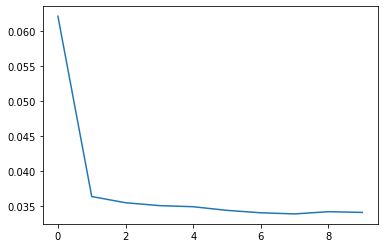

In [58]:
from matplotlib import pyplot
pyplot.plot(fit.history['loss'], label='train')
pyplot.plot(fit.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [59]:
yhat=model.predict(test_X)

In [60]:
yhat

array([[0.3889862 ],
       [0.3901501 ],
       [0.40609893],
       ...,
       [0.59200597],
       [0.6481599 ],
       [0.6383318 ]], dtype=float32)

In [31]:
# # make a prediction
# yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# # invert scaling for forecast
# inv_yhat = join((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:176 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 9]


,Unnamed: 0,RegionName,Date,StringencyIndexForDisplay,GovernmentResponseIndexForDisplay,ContainmentHealthIndexForDisplay,EconomicSupportIndexForDisplay,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,parks_percent_change_from_baseline,AvgIndex,AvgMobility
0,0,Alaska,20200301,0.126307,0.120338,0.139118,0.0,19.0,14.5,18.0,5.5,-1.0,11.5,0.098364,0.730858
1,1,Alaska,20200302,0.126307,0.120338,0.139118,0.0,6.0,6.5,6.5,0.5,0.0,6.5,0.098364,0.643852
2,2,Alaska,20200303,0.126307,0.120338,0.139118,0.0,11.0,10.0,4.0,3.0,0.0,-5.0,0.098364,0.663573
3,3,Alaska,20200304,0.126307,0.120338,0.139118,0.0,10.0,8.5,7.5,3.0,-0.5,3.0,0.098364,0.665893
4,4,Alaska,20200305,0.126307,0.120338,0.139118,0.0,8.5,7.5,3.0,2.5,-0.5,6.0,0.098364,0.648492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341,9341,Wyoming,20200827,0.421101,0.541285,0.521694,0.5,8.0,18.0,17.5,-25.5,3.5,174.5,0.524686,0.640371
9342,9342,Wyoming,20200828,0.421101,0.541285,0.521694,0.5,3.5,17.0,19.5,-23.5,3.0,196.0,0.524686,0.636891
9343,9343,Wyoming,20200829,0.421101,0.541285,0.521694,0.5,7.0,23.0,44.0,-8.0,-1.0,283.0,0.524686,0.751740
9344,9344,Wyoming,20200830,0.421101,0.541285,0.521694,0.5,11.5,20.0,25.5,-7.0,0.0,186.0,0.524686,0.714617
